In [2]:
from numpy import *

In [3]:
#Intrinsic parameters
a_u = 557.0943
a_v = 712.9824
u_0 = 326.3819
v_0 = 298.6679
gamma = 0
# Location of the world reference frame in camera coordinates in mm
Tx = 100
Ty = 0
Tz = 1500
# World rotation w.r.t. camera coordinates Euler XYX1 angles
Phix = 0.8*pi/2
Phiy = -1.8*pi/2
Phix1 = pi/5

In [4]:
K = array([[a_u, gamma, u_0],
          [0, a_v, v_0],
          [0, 0, 1]])
K.shape

(3, 3)

In [5]:
K

array([[557.0943,   0.    , 326.3819],
       [  0.    , 712.9824, 298.6679],
       [  0.    ,   0.    ,   1.    ]])

In [6]:
from math import *

In [7]:
ctw = array([[Tx],[Ty],[Tz]])
ctw.shape
ctw

array([[ 100],
       [   0],
       [1500]])

In [8]:
R_x = array([[1, 0, 0],
              [0, cos(Phix), -sin(Phix)],
              [0, sin(Phix), cos(Phix)]])
R_y = array([[cos(Phiy), 0, sin(Phiy)],
              [0, 1, 0],
              [-sin(Phiy), 0, cos(Phiy)]])
# R_z = array([[cos(Phix1), -sin(Phix1), 0],
#               [sin(Phix1), cos(Phix1), 0],
#               [0, 0, 1]])
R_x1 = array([[1, 0, 0],
              [0, cos(Phix1), -sin(Phix1)],
              [0, sin(Phix1), cos(Phix1)]])
#what to take the order of rotation? How to decide?
cRw = R_x @ R_y @ R_x1
# cTw = array([[Tx],[Ty],[Tz]])
cTw=array([[cRw[0,0], cRw[0,1], cRw[0,2], ctw[0,0]],
          [cRw[1,0], cRw[1,1], cRw[1,2], ctw[1,0]],
          [cRw[2,0], cRw[2,1], cRw[2,2], ctw[2,0]],
          [0, 0, 0, 1]])

In [9]:
cTw

array([[-9.51056516e-01, -1.81635632e-01, -2.50000000e-01,
         1.00000000e+02],
       [-2.93892626e-01,  7.81656755e-01,  5.50127114e-01,
         0.00000000e+00],
       [ 9.54915028e-02,  5.96675133e-01, -7.96781123e-01,
         1.50000000e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [10]:
P = K @ array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0]]) @ cTw

In [11]:
P.shape

(3, 4)

In [12]:
P = P/P[2,3]

In [13]:
P

array([[-3.32440977e-01,  6.23705255e-02, -2.66219008e-01,
         3.63521520e+02],
       [-1.20680016e-01,  4.90343479e-01,  1.02838670e-01,
         2.98667900e+02],
       [ 6.36610019e-05,  3.97783422e-04, -5.31187416e-04,
         1.00000000e+00]])

In [14]:
def create_3d_homogenous_coordinates(number_of_points):
    three_d = random.randint(-480, 480, size=(number_of_points, 3))
    ones_ = ones((number_of_points,1))
    three_d_homo = concatenate((three_d, ones_), axis=1).T
    return three_d_homo

In [15]:
three_d_homo = create_3d_homogenous_coordinates(6)

In [16]:
three_d_homo

array([[ -41.,  225.,  -32.,   89., -290.,  253.],
       [ 347.,  468.,  141.,  343., -329., -150.],
       [ -68.,    8.,  317.,  377., -139.,  299.],
       [   1.,    1.,    1.,    1.,    1.,    1.]])

In [17]:
three_d_homo.shape

(4, 6)

In [18]:
cRw = R_x * R_y * R_x1
cRw1 = R_x1 * R_y * R_x
print(f"This is the value of cRw {cRw}")
print(f"This is the value of cRw1 {cRw1}")

This is the value of cRw [[-0.95105652  0.         -0.        ]
 [ 0.          0.25        0.        ]
 [ 0.          0.         -0.23776413]]
This is the value of cRw1 [[-0.95105652  0.         -0.        ]
 [ 0.          0.25        0.        ]
 [ 0.          0.         -0.23776413]]


In [19]:
print(P.shape)
print(three_d_homo.shape)

(3, 4)
(4, 6)


In [20]:
def compute_2d_homogenous_coordinates(P, three_d_homo):
    two_dimensional_homo = (P @ three_d_homo)
    return two_dimensional_homo

In [21]:
two_dimensional_homo = compute_2d_homogenous_coordinates(P, three_d_homo)

In [22]:
def two_dimensional_homo_to_cartesian(points):
    cartesian_coordinates = points[0:2,]/points[2:3,]
    return cartesian_coordinates

In [23]:
two_d_cartesian_coordinates = two_dimensional_homo_to_cartesian(two_dimensional_homo)
two_d_cartesian_coordinates

array([[355.85343611, 263.97945301, 337.10581402, 270.70485662,
        515.31919459, 238.78588669],
       [398.42544372, 419.49748211, 456.45752248, 525.44086701,
        170.95411347, 282.50906598]])

In [24]:
x = two_d_cartesian_coordinates[0, :]
y = two_d_cartesian_coordinates[1, :]

In [25]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'pixel location in y')

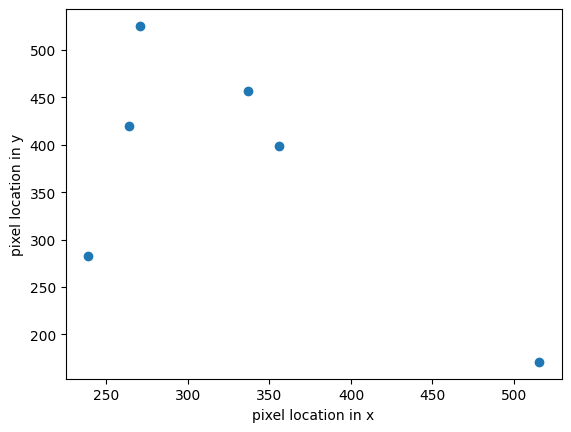

In [26]:
plt.scatter(x, y)
plt.xlabel('pixel location in x', fontsize=10)
plt.ylabel('pixel location in y', fontsize=10)

In [27]:
def three_dimensional_homo_to_cartesian(points):
    cartesian_coordinates = points[0:3,] / points[3:4,]
    return cartesian_coordinates

In [28]:
three_d_cartesian = three_dimensional_homo_to_cartesian(three_d_homo)
three_d_cartesian

array([[ -41.,  225.,  -32.,   89., -290.,  253.],
       [ 347.,  468.,  141.,  343., -329., -150.],
       [ -68.,    8.,  317.,  377., -139.,  299.]])

In [29]:
Xw, Yw, Zw = three_d_cartesian[:, 0]

In [30]:
Xw, Yw, Zw

(-41.0, 347.0, -68.0)

In [31]:
def Hall_method(three_d_cartesian, two_d_cartesian):
    n = three_d_cartesian.shape[1]
    Q = zeros((2*n, 11))
    B = zeros((2*n, 1))
    for i in range(n):
        Xw, Yw, Zw = three_d_cartesian[:, i]
        Xu, Yu = two_d_cartesian[:, i]
        # First row for Xu
        Q[2*i] = [Xw, Yw, Zw, 1, 0, 0, 0, 0, -Xu*Xw, -Xu*Yw, -Xu*Zw]
        B[2*i] = Xu
        # Second row for Yu
        Q[2*i + 1] = [0, 0, 0, 0, Xw, Yw, Zw, 1, -Yu*Xw, -Yu*Yw, -Yu*Zw]
        B[2*i + 1] = Yu
    A, residuals, rank, s = linalg.lstsq(Q, B, rcond=None) # write reasoning for using this method
    A = append(A, [1])
    A = A.reshape(-1, 1) # write reasoning for this reshaping function and the parameters that are passed to it
    P_recovered = zeros((3,4))
    lower_limit = 0
    upper_limit = 4
    for i in range(3):
        P_recovered[i, :] = A[lower_limit:upper_limit].T
        lower_limit += 4
        upper_limit += 4

    return P_recovered

In [32]:
P_recovered = Hall_method(three_d_cartesian, two_d_cartesian_coordinates)

In [33]:
P_recovered.shape

(3, 4)

In [34]:
error = linalg.norm(P_recovered - P) #write the reasoning for using this function in step 7

In [35]:
P

array([[-3.32440977e-01,  6.23705255e-02, -2.66219008e-01,
         3.63521520e+02],
       [-1.20680016e-01,  4.90343479e-01,  1.02838670e-01,
         2.98667900e+02],
       [ 6.36610019e-05,  3.97783422e-04, -5.31187416e-04,
         1.00000000e+00]])

In [36]:
error

6.054582812836152e-10

In [37]:
from scipy.linalg import rq

def get_intrinsics_from_proj_matrix(P):
    M = P[:, :3]
    # Perform RQ decomposition
    R, Q = rq(M)
    # Check the determinant of Q to make cRw a proper rotation
    if linalg.det(Q) < 0:
        cRw = -Q
    else:
        cRw = Q
    # Get the normalized intrinsics
    K = R / R[2, 2] # Normalize K by the (3,3) element of R
    return K, cRw

In [38]:
K_recovered, cRw_recovered = get_intrinsics_from_proj_matrix(P_recovered)

In [39]:
K_recovered

array([[-5.57094300e+02,  1.38530437e-08,  3.26381900e+02],
       [ 0.00000000e+00, -7.12982400e+02,  2.98667900e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [40]:
cRw_recovered

array([[ 0.95105652,  0.18163563,  0.25      ],
       [ 0.29389263, -0.78165676, -0.55012711],
       [ 0.0954915 ,  0.59667513, -0.79678112]])

In [41]:
def add_noise_to_2d_cartesian_points(two_d_cartesian_coordinates):
    noise = random.normal(0, 0.5, two_d_cartesian_coordinates.shape)
    two_d_cartesian_coordinates_noisy = two_d_cartesian_coordinates + noise
    return two_d_cartesian_coordinates_noisy

In [42]:
two_d_cartesian_coordinates_noisy = add_noise_to_2d_cartesian_points(two_d_cartesian_coordinates)
P_recovered_noisy = Hall_method(three_d_cartesian, two_d_cartesian_coordinates_noisy)

In [43]:
error = linalg.norm(P_recovered - P_recovered_noisy)

In [44]:
error

0.5390342505783681

In [45]:
K_recovered_noisy, cRw_recovered_noisy = get_intrinsics_from_proj_matrix(P_recovered_noisy)

In [46]:
K_recovered_noisy

array([[-553.12581461,    2.58707623,  337.90023838],
       [   0.        , -705.52979569,  296.51829967],
       [   0.        ,    0.        ,    1.        ]])

In [47]:
K_recovered

array([[-5.57094300e+02,  1.38530437e-08,  3.26381900e+02],
       [ 0.00000000e+00, -7.12982400e+02,  2.98667900e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [48]:
two_dimensional_homo_noisy_recovered = compute_2d_homogenous_coordinates(P_recovered_noisy, three_d_homo)

In [49]:
two_d_cartesian_coordinates_noisy_recovered = two_dimensional_homo_to_cartesian(two_dimensional_homo_noisy_recovered)

In [50]:
two_d_cartesian_coordinates_noisy_recovered

array([[355.6560024 , 263.58044834, 337.45966541, 270.46511949,
        515.21639358, 239.41002424],
       [397.31738773, 418.77048025, 456.25980991, 525.46965874,
        172.14841686, 283.06687211]])

In [51]:
two_d_cartesian_coordinates_noisy

array([[355.66478319, 263.57984959, 337.49729697, 270.4291159 ,
        515.20262958, 239.41472147],
       [397.3109104 , 418.78158912, 456.30544424, 525.43198784,
        172.14081103, 283.06233733]])

In [52]:
error_per_point = linalg.norm(two_d_cartesian_coordinates - two_d_cartesian_coordinates_noisy_recovered, axis=0)
# So what does axis=1 mean in this case?
# Given image_pts of shape (N, 2):

# python
# np.linalg.norm(image_pts, axis=1)
# axis=1 means: compute the norm along axis 1 — i.e., across the columns for each row.

# Since each row is [x, y], this computes:

# sqrt(x^2+y^2)
 
# for each point — the Euclidean length of that point from the origin.


# we have N 2D image points.

# Case 1: Row-wise storage (most common)
# python
# image_pts = np.array([
#     [x1, y1],
#     [x2, y2],
#     ...
#     [xN, yN]
# ])  # Shape: (N, 2)
# Each row is a point.

# To compute the norm (e.g., reprojection error) per point, use:

# python
# np.linalg.norm(diff, axis=1)  # → shape (N,)
# because we're taking the norm across columns (axis 1) for each row.

# Case 2: Column-wise storage 
# python
# image_pts = np.array([
#     [x1, x2, ..., xN],
#     [y1, y2, ..., yN]
# ])  # Shape: (2, N)
# Each column is a point
# Now, to compute the norm per point, use:

# python
# np.linalg.norm(diff, axis=0)  # → shape (N,)
# because we're taking the norm down the rows (axis 0) for each column.


In [53]:
error_per_point

array([1.12550795, 0.82929876, 0.40534068, 0.24145984, 1.19871958,
       0.83707549])

In [54]:
average_projection_error = mean(error_per_point)
average_projection_error

0.7729003847587844

In [55]:
three_d_ten_points_homo = create_3d_homogenous_coordinates(10)
three_d_ten_points_cartesian = three_dimensional_homo_to_cartesian(three_d_ten_points_homo)
# three_d_ten_points_homo = concatenate((three_d_ten_points, ones((10,1))), axis=1).T
# three_d_ten_points_homo.shape
two_dimensional_ten_points_homo = compute_2d_homogenous_coordinates(P, three_d_ten_points_homo)
two_d_ten_points_cartesian_coordinates = two_dimensional_homo_to_cartesian(two_dimensional_ten_points_homo)

In [56]:
two_d_ten_points_cartesian_coordinates_noisy = add_noise_to_2d_cartesian_points(two_d_ten_points_cartesian_coordinates)

In [57]:
P_recovered_ten_points_noisy = Hall_method(three_d_ten_points_cartesian, two_d_ten_points_cartesian_coordinates_noisy)

In [58]:
P_recovered_ten_points_noisy

array([[-3.26133600e-01,  6.24133447e-02, -2.65833339e-01,
         3.63979499e+02],
       [-1.14521637e-01,  4.88493809e-01,  1.02426607e-01,
         2.98900147e+02],
       [ 7.39590413e-05,  3.95054282e-04, -5.31288647e-04,
         1.00000000e+00]])

In [59]:
error_ten_points_noisy = linalg.norm(P_recovered - P_recovered_ten_points_noisy)
error_ten_points_noisy

0.5135806690831718

In [60]:
K_recovered_ten_points_noisy, cRw_recovered_ten_points_noisy = get_intrinsics_from_proj_matrix(P_recovered_ten_points_noisy)

In [61]:
two_dimensional_ten_points_homo_noisy_recovered = compute_2d_homogenous_coordinates(P_recovered_ten_points_noisy, three_d_ten_points_homo)
two_dimensional_ten_points_cartesian_noisy_recovered = two_dimensional_homo_to_cartesian(two_dimensional_ten_points_homo_noisy_recovered)

In [62]:
error_per_point_ten_point = linalg.norm(two_d_ten_points_cartesian_coordinates - two_dimensional_ten_points_cartesian_noisy_recovered, axis=0)
error_per_point_ten_point

array([0.20093325, 0.47902011, 0.32946338, 0.40447444, 0.44663042,
       0.54456968, 0.35986695, 0.6402208 , 0.59063437, 0.34406436])

In [63]:
average_projection_error_ten_points = mean(error_per_point_ten_point)
average_projection_error_ten_points

0.4339877769265435

In [64]:
three_d_fifty_points_homo = create_3d_homogenous_coordinates(50)
three_d_fifty_points_cartesian = three_dimensional_homo_to_cartesian(three_d_fifty_points_homo)
# three_d_fifty_points_homo.shape
two_dimensional_fifty_points_homo = compute_2d_homogenous_coordinates(P, three_d_fifty_points_homo)
two_d_fifty_points_cartesian_coordinates = two_dimensional_homo_to_cartesian(two_dimensional_fifty_points_homo)

In [65]:
two_d_fifty_points_cartesian_coordinates_noisy = add_noise_to_2d_cartesian_points(two_d_fifty_points_cartesian_coordinates)

In [66]:
P_recovered_fifty_points_noisy = Hall_method(three_d_fifty_points_cartesian, two_d_fifty_points_cartesian_coordinates_noisy)

In [67]:
K_recovered_fifty_points_noisy, cRw_recovered_fifty_points_noisy = get_intrinsics_from_proj_matrix(P_recovered_fifty_points_noisy)

In [68]:
error_fifty_points_noisy = linalg.norm(P_recovered - P_recovered_fifty_points_noisy)
error_fifty_points_noisy

0.05105242732649119

In [69]:
two_dimensional_fifty_points_homo_noisy_recovered = compute_2d_homogenous_coordinates(P_recovered_fifty_points_noisy, three_d_fifty_points_homo)
two_dimensional_fifty_points_cartesian_noisy_recovered = two_dimensional_homo_to_cartesian(two_dimensional_fifty_points_homo_noisy_recovered)

In [70]:
error_per_point_fifty_point = linalg.norm(two_d_fifty_points_cartesian_coordinates - two_dimensional_fifty_points_cartesian_noisy_recovered, axis=0)
error_per_point_fifty_point

array([0.16864365, 0.18462265, 0.18373353, 0.31325241, 0.12240296,
       0.27872416, 0.12480465, 0.05122575, 0.11715151, 0.16447474,
       0.18713827, 0.05177339, 0.21202174, 0.14713257, 0.19053874,
       0.05240046, 0.06424653, 0.1133545 , 0.07777288, 0.10004051,
       0.03653405, 0.04506333, 0.01240727, 0.13920951, 0.17676582,
       0.08760782, 0.07877037, 0.03432947, 0.28797785, 0.13921277,
       0.24896258, 0.22412335, 0.07157561, 0.08489708, 0.18325174,
       0.11339951, 0.13935498, 0.04245396, 0.03056546, 0.21685745,
       0.04326859, 0.01287056, 0.02348599, 0.02857997, 0.0186264 ,
       0.15135983, 0.20987885, 0.02925428, 0.07914234, 0.1042769 ])

In [71]:
average_projection_error_fifty_points = mean(error_per_point_fifty_point)
average_projection_error_fifty_points

0.11999038612346706

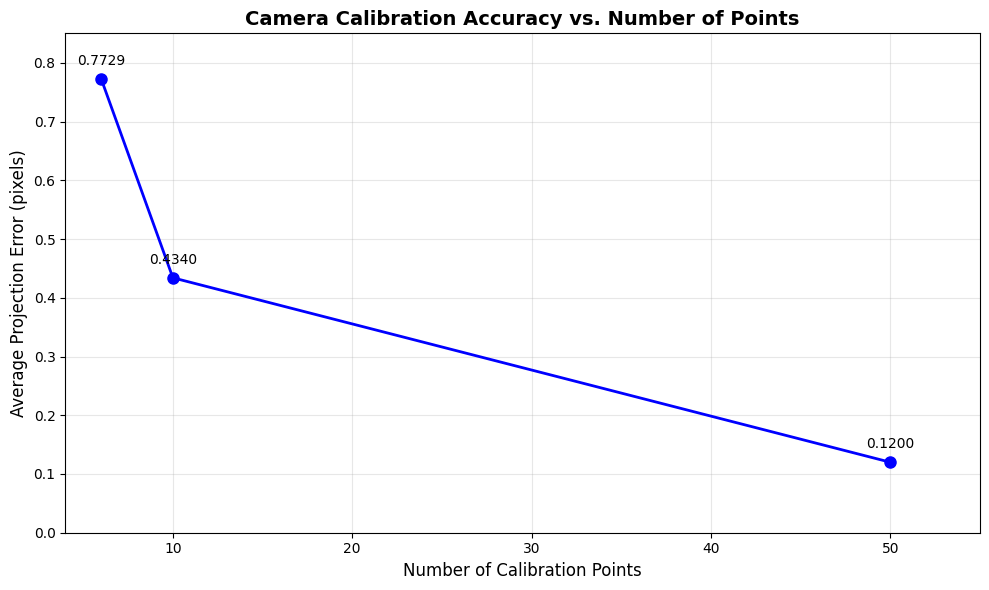

In [72]:
point_counts = [6, 10, 50]
errors = [average_projection_error, average_projection_error_ten_points, average_projection_error_fifty_points] 


plt.figure(figsize=(10, 6))
plt.plot(point_counts, errors, 'bo-', linewidth=2, markersize=8)


plt.xlabel('Number of Calibration Points', fontsize=12)
plt.ylabel('Average Projection Error (pixels)', fontsize=12)
plt.title('Camera Calibration Accuracy vs. Number of Points', fontsize=14, fontweight='bold')

plt.grid(True, alpha=0.3)

for i, (x, y) in enumerate(zip(point_counts, errors)):
    plt.annotate(f'{y:.4f}', (x, y), xytext=(0, 10), 
                textcoords='offset points', ha='center', fontsize=10)


plt.xlim(min(point_counts) - 2, max(point_counts) + 5)
plt.ylim(0, max(errors) * 1.1)

plt.tight_layout()
plt.show()


In [73]:
#normal recovered
error_in_K_6points_compared_to_original = linalg.norm(K_recovered - K)
error_in_cRw_6points_compared_to_original = linalg.norm(cRw_recovered - cRw)
print(f"This is the error in K recovered from 6 points {error_in_K_6points_compared_to_original} when compared to original")
print(f"This is the error in cRw recovered from 6 points {error_in_cRw_6points_compared_to_original} when compared to original")

#noisy recovered - 6points
error_in_K_6points_compared_to_original_noisy = linalg.norm(K_recovered_noisy - K)
error_in_cRw_6points_compared_to_original_noisy = linalg.norm(cRw_recovered_noisy - cRw)
print(f"This is the error in K recovered from 6 points with noise {error_in_K_6points_compared_to_original_noisy} when compared to original")
print(f"This is the error in cRw recovered from 6 points with noise {error_in_cRw_6points_compared_to_original_noisy} when compared to original")

error_in_K_6points_compared_to_recovered_noisy = linalg.norm(K_recovered_noisy - K_recovered)
error_in_cRw_6points_compared_to_recovered_noisy = linalg.norm(cRw_recovered_noisy - cRw_recovered)
print(f"This is the error in K recovered from 6 points with noise {error_in_K_6points_compared_to_recovered_noisy} when compared to normal recovered")
print(f"This is the error in cRw recovered from 6 points with noise {error_in_cRw_6points_compared_to_recovered_noisy} when compared to normal recovered")

#noisy recovered - 10points
error_in_K_10points_compared_to_original_noisy = linalg.norm(K_recovered_ten_points_noisy - K)
error_in_cRw_10points_compared_to_original_noisy = linalg.norm(cRw_recovered_ten_points_noisy - cRw)
print(f"This is the error in K recovered from 10 points with noise {error_in_K_10points_compared_to_original_noisy} when compared to original")
print(f"This is the error in cRw recovered from 10 points with noise {error_in_cRw_10points_compared_to_original_noisy} when compared to original") 

error_in_K_10points_compared_to_recovered_noisy = linalg.norm(K_recovered_ten_points_noisy - K_recovered)
error_in_cRw_10points_compared_to_recovered_noisy = linalg.norm(cRw_recovered_ten_points_noisy - cRw_recovered)
print(f"This is the error in K recovered from 10 points with noise {error_in_K_10points_compared_to_recovered_noisy} when compared to normal recovered")
print(f"This is the error in cRw recovered from 10 points with noise {error_in_cRw_10points_compared_to_recovered_noisy} when compared to normal recovered")

#noisy recovered - 50points
error_in_K_50points_compared_to_original_noisy = linalg.norm(K_recovered_fifty_points_noisy - K)
error_in_cRw_50points_compared_to_original_noisy = linalg.norm(cRw_recovered_fifty_points_noisy - cRw)
print(f"This is the error in K recovered from 50 points with noise {error_in_K_50points_compared_to_original_noisy} when compared to original")
print(f"This is the error in cRw recovered from 50 points with noise {error_in_cRw_50points_compared_to_original_noisy} when compared to original")

error_in_K_50points_compared_to_recovered_noisy = linalg.norm(K_recovered_fifty_points_noisy - K_recovered)
error_in_cRw_50points_compared_to_recovered_noisy = linalg.norm(cRw_recovered_fifty_points_noisy - cRw_recovered)
print(f"This is the error in K recovered from 50 points with noise {error_in_K_50points_compared_to_recovered_noisy} when compared to normal recovered")
print(f"This is the error in cRw recovered from 50 points with noise {error_in_cRw_50points_compared_to_recovered_noisy} when compared to normal recovered")


This is the error in K recovered from 6 points 1809.6385957326834 when compared to original
This is the error in cRw recovered from 6 points 2.417538771250279 when compared to original
This is the error in K recovered from 6 points with noise 1801.3632443475472 when compared to original
This is the error in cRw recovered from 6 points with noise 2.4178332734765218 when compared to original
This is the error in K recovered from 6 points with noise 14.67228855640824 when compared to normal recovered
This is the error in cRw recovered from 6 points with noise 0.03437629639734119 when compared to normal recovered
This is the error in K recovered from 10 points with noise 1805.1555590346452 when compared to original
This is the error in cRw recovered from 10 points with noise 2.4181288648852375 when compared to original
This is the error in K recovered from 10 points with noise 10.571070914625293 when compared to normal recovered
This is the error in cRw recovered from 10 points with noise 